# Asset Aunthentication_ Muestra Nueva 

Autenticación y autorización de activos del entorno

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
enlace=r"H:\Mi unidad\Trabajo de grado 2\DATAFRAME SOLOS_PROPUESTA\Data Base_PROPUESTA TAMURA\Asset_Authentication_MuestraEdwin.csv"
df=pd.read_csv(enlace)

C:\Users\Windows 10 Pro\AppData\Local\Temp\ipykernel_20576\1929704581.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(enlace)


In [3]:
df.head(3)

,timestamp,json.destination_user,json.source_json.eventData.TargetDomainName,json.r7_context.destination_user.domain,json.destination_account,json.source_json.computerName,json.source_json.eventData.IpPort,json.destination_asset_address,json.source_json.eventCode,json.result,json.timestamp,json.source_json.timeGenerated,json.service,json.source_asset_address,fecha,hora
0,1721074753543,beinis.navarro,BN2.ARMADA.MIL.CO,bn2.armada.mil.co,beinis.navarro,SERV_BNL02.bn2.armada.mil.co,51483.0,172.24.70.34,4624.0,SUCCESS,2024-07-15T20:17:45.737Z,20240715201745.737408-000,kerberos,172.24.70.34,2024/07/15,15:17:45
1,1721074753543,juan.molina.me,BN2.ARMADA.MIL.CO,bn2.armada.mil.co,juan.molina.me,SERV_BNL02.bn2.armada.mil.co,64687.0,172.24.60.217,4624.0,SUCCESS,2024-07-15T20:17:43.322Z,20240715201743.322276-000,kerberos,172.24.60.217,2024/07/15,15:17:43
2,1721074753544,juan.molina.me,BN2.ARMADA.MIL.CO,bn2.armada.mil.co,juan.molina.me,SERV_BNL02.bn2.armada.mil.co,64686.0,172.24.60.217,4624.0,SUCCESS,2024-07-15T20:17:43.315Z,20240715201743.315821-000,kerberos,172.24.60.217,2024/07/15,15:17:43


# Visualización y agrupación por hora 

# 1. TargetDomainName

Dominio objetivo al cual se está intentando autenticar o acceder. Este campo es común en los registros de eventos de seguridad y auditoría, especialmente en sistemas basados en Windows

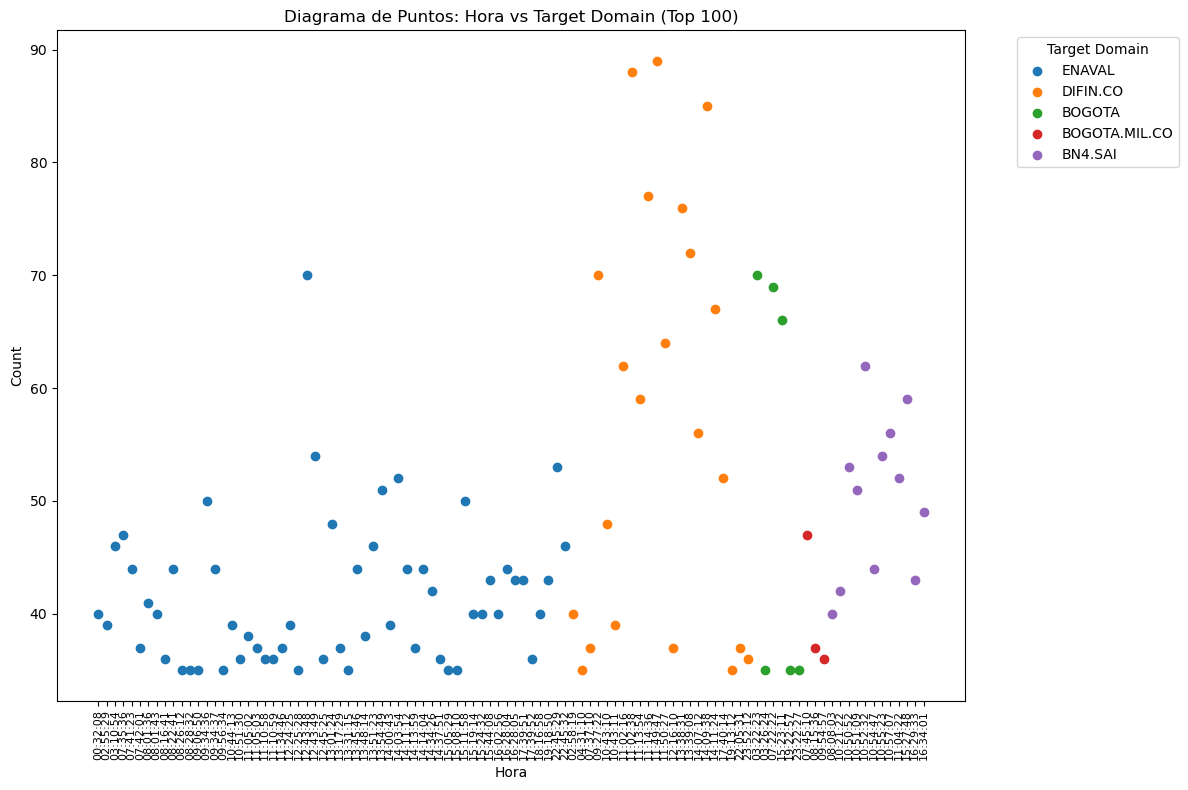

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Agrupar y contar ocurrencias
df_agrupado = df.groupby(['hora', 'json.source_json.eventData.TargetDomainName']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

# Seleccionar los primeros 100 registros
top_100 = df_agrupado.head(100).sort_values(by='hora')

# Crear el diagrama de puntos
plt.figure(figsize=(12, 8))

# Graficar cada 'json.source_json.eventData.TargetDomainName' individualmente como puntos
for address in top_100['json.source_json.eventData.TargetDomainName'].unique():
    subset = top_100[top_100['json.source_json.eventData.TargetDomainName'] == address]
    plt.scatter(subset['hora'], subset['count'], label=address)

plt.xlabel('Hora')
plt.ylabel('Count')
plt.title('Diagrama de Puntos: Hora vs Target Domain (Top 100)')
plt.legend(title='Target Domain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, fontsize=8)  # Ajusta el tamaño de la fuente según sea necesario
plt.tight_layout()
plt.show()


# Ordenar por fecha 

Primeros 7 datos en orden descendente por 'count':
         fecha json.source_json.eventData.TargetDomainName   count
75  2024/07/18                               BOGOTA.MIL.CO  171805
27  2024/07/16                               BOGOTA.MIL.CO   78724
6   2024/07/15                               BOGOTA.MIL.CO   56418
52  2024/07/17                               BOGOTA.MIL.CO   51650
22  2024/07/16                           BN2.ARMADA.MIL.CO   49539
34  2024/07/16                                      ENAVAL   47773
59  2024/07/17                                      ENAVAL   47617


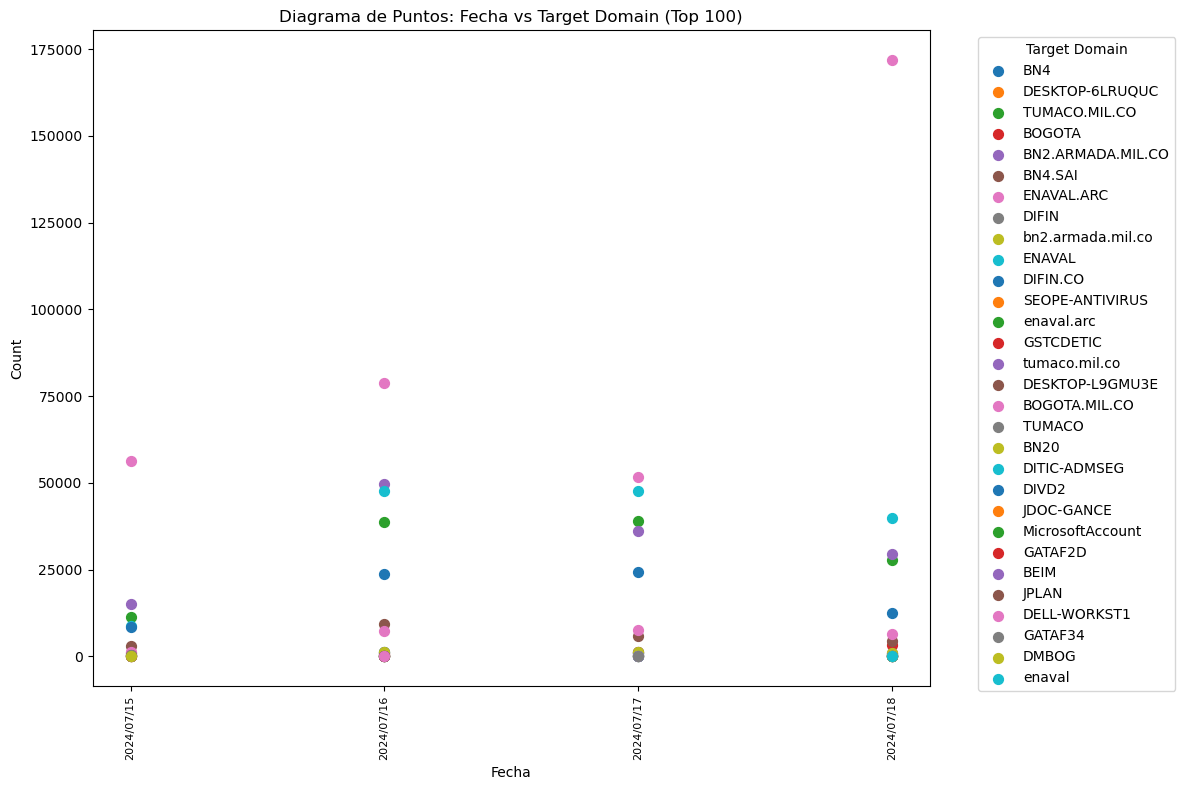

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Agrupar y contar ocurrencias
df_agrupado = df.groupby(['fecha', 'json.source_json.eventData.TargetDomainName']).size().reset_index(name='count')

# Filtrar filas donde 'json.source_json.eventData.TargetDomainName' no es '.'
df_agrupado = df_agrupado[df_agrupado['json.source_json.eventData.TargetDomainName'] != '.']

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

# Seleccionar los primeros 100 registros
top_100 = df_agrupado.head(100).sort_values(by='fecha')

# Mostrar los primeros 7 datos en orden descendente por 'count'
print("Primeros 7 datos en orden descendente por 'count':")
print(top_100.sort_values(by='count', ascending=False).head(7))

# Crear el diagrama de puntos
plt.figure(figsize=(12, 8))

# Graficar cada 'json.source_json.eventData.TargetDomainName' individualmente como puntos
for address in top_100['json.source_json.eventData.TargetDomainName'].unique():
    subset = top_100[top_100['json.source_json.eventData.TargetDomainName'] == address]
    plt.scatter(subset['fecha'], subset['count'], label=address, s=50)  # s controla el tamaño de los puntos

plt.xlabel('Fecha')
plt.ylabel('Count')
plt.title('Diagrama de Puntos: Fecha vs Target Domain (Top 100)')
plt.legend(title='Target Domain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, fontsize=8)  # Ajusta el tamaño de la fuente según sea necesario
plt.tight_layout()
plt.show()


# 2. json.r7_context.destination_user.domain
Dominio del usuario destino de un evento de autenticación o acceso.

In [9]:
df["json.r7_context.destination_user.domain"].unique()

array(['bn2.armada.mil.co', nan, 'bn20', 'tumaco.mil.co', 'tumaco',
       'bogota.mil.co', 'bogota', 'grupecol.com', 'bn4.sai', 'bn4',
       'difin.co', 'difin', 'enaval.arc', 'enaval', 'grupecol0',
       'recoip.mil.co', 'esin_', 'recoip', 'beim', 'leguizamo', 'carreno',
       'RECOIC', 'cartagena'], dtype=object)

Primeros 7 datos en orden descendente por 'count':
            hora json.r7_context.destination_user.domain  count
105533  12:43:48                                  enaval     70
17905   03:22:23                                  bogota     70
39869   07:22:22                                  bogota     69
134028  15:23:11                                  bogota     66
86062   10:52:32                                 bn4.sai     62
135138  15:27:48                                 bn4.sai     59
87083   10:57:07                                 bn4.sai     56


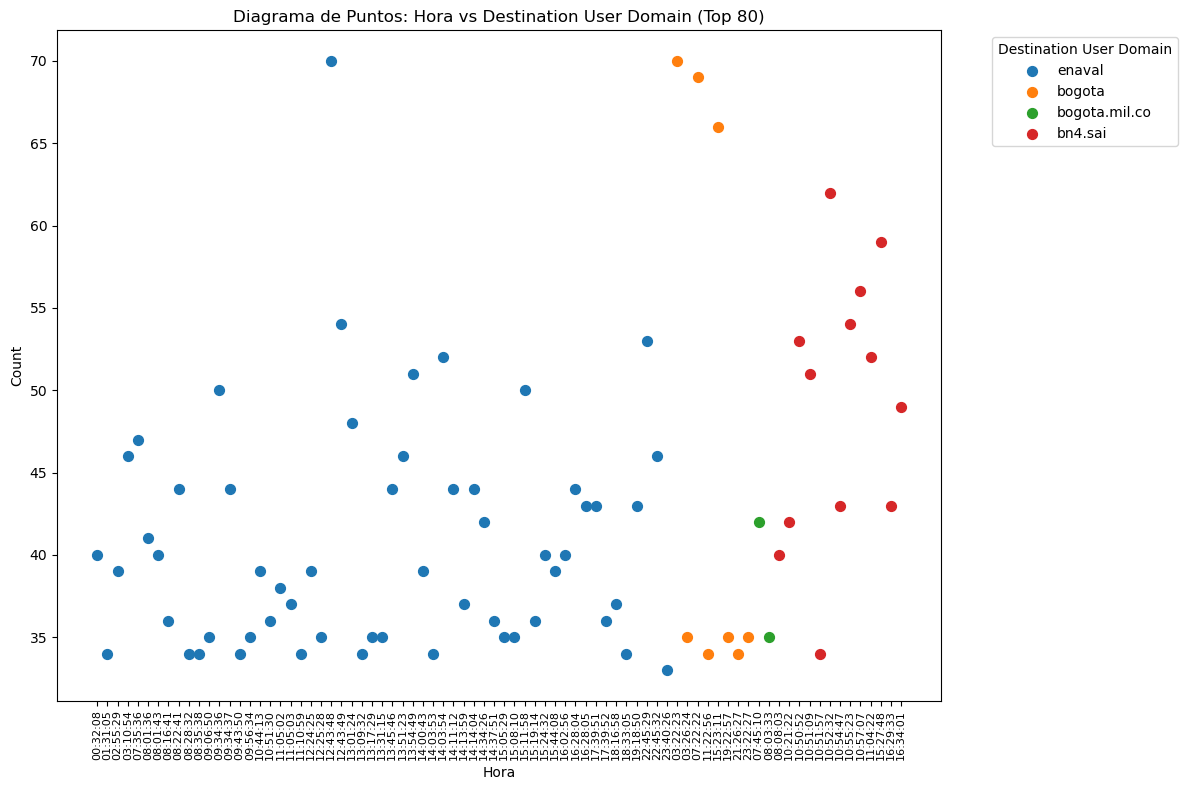

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Agrupar y contar ocurrencias
df_agrupado = df.groupby(['hora', 'json.r7_context.destination_user.domain']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

# Seleccionar los primeros 80 registros
top_80 = df_agrupado.head(80).sort_values(by='hora')

# Mostrar los primeros 7 datos en orden descendente por 'count'
print("Primeros 7 datos en orden descendente por 'count':")
print(top_80.sort_values(by='count', ascending=False).head(7))

# Crear el diagrama de puntos
plt.figure(figsize=(12, 8))

# Graficar cada 'json.r7_context.destination_user.domain' individualmente como puntos
for address in top_80['json.r7_context.destination_user.domain'].unique():
    subset = top_80[top_80['json.r7_context.destination_user.domain'] == address]
    plt.scatter(subset['hora'], subset['count'], label=address, s=50)  # s controla el tamaño de los puntos

plt.xlabel('Hora')
plt.ylabel('Count')
plt.title('Diagrama de Puntos: Hora vs Destination User Domain (Top 80)')
plt.legend(title='Destination User Domain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, fontsize=8)  # Ajusta el tamaño de la fuente según sea necesario
plt.tight_layout()
plt.show()



# Por Fecha 

Primeros 7 datos en orden descendente por 'count':
         fecha json.r7_context.destination_user.domain   count
41  2024/07/18                           bogota.mil.co  151090
17  2024/07/16                           bogota.mil.co   64692
5   2024/07/15                           bogota.mil.co   48106
12  2024/07/16                       bn2.armada.mil.co   46395
32  2024/07/17                                  enaval   44070
29  2024/07/17                           bogota.mil.co   44038
44  2024/07/18                                  enaval   37607


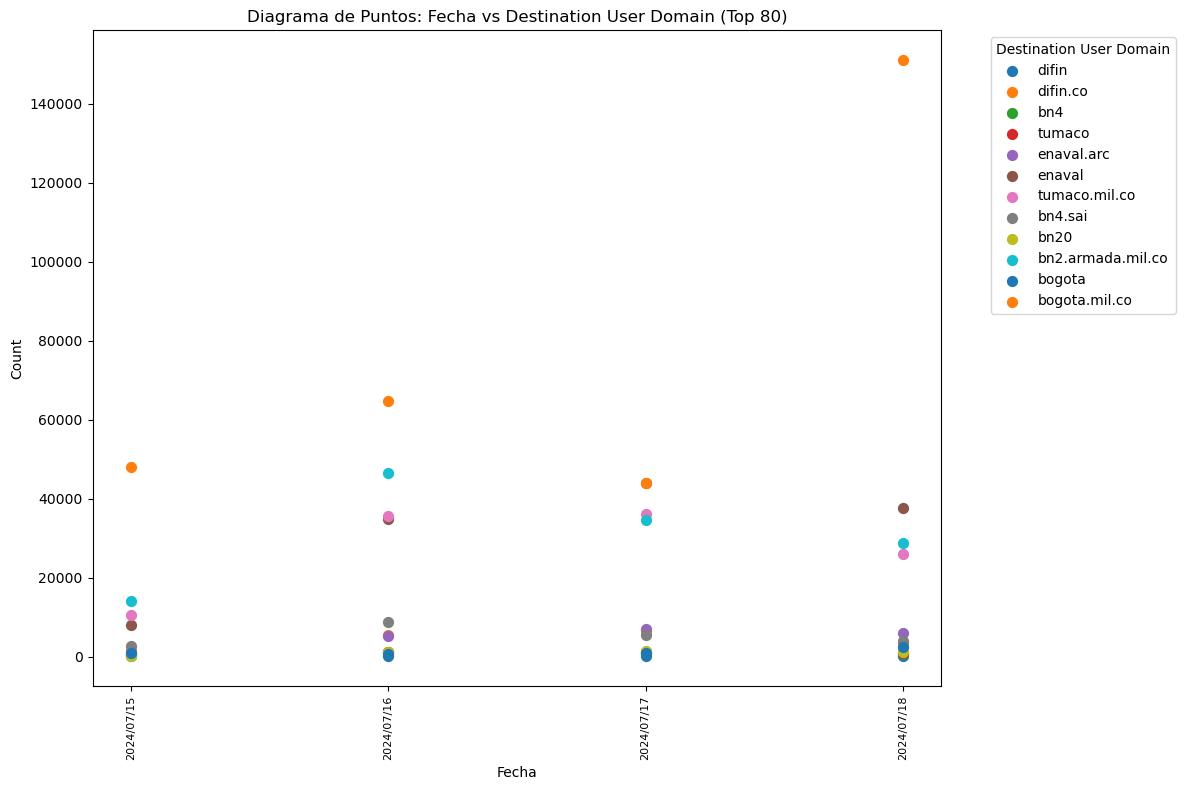

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Agrupar y contar ocurrencias
df_agrupado = df.groupby(['fecha', 'json.r7_context.destination_user.domain']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

# Seleccionar los primeros 80 registros
top_80 = df_agrupado.head(80).sort_values(by='fecha')

# Mostrar los primeros 7 datos en orden descendente por 'count'
print("Primeros 7 datos en orden descendente por 'count':")
print(top_80.sort_values(by='count', ascending=False).head(7))

# Crear el diagrama de puntos
plt.figure(figsize=(12, 8))

# Graficar cada 'json.r7_context.destination_user.domain' individualmente como puntos
for address in top_80['json.r7_context.destination_user.domain'].unique():
    subset = top_80[top_80['json.r7_context.destination_user.domain'] == address]
    plt.scatter(subset['fecha'], subset['count'], label=address, s=50)  # s controla el tamaño de los puntos

plt.xlabel('Fecha')
plt.ylabel('Count')
plt.title('Diagrama de Puntos: Fecha vs Destination User Domain (Top 80)')
plt.legend(title='Destination User Domain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, fontsize=8)  # Ajusta el tamaño de la fuente según sea necesario
plt.tight_layout()
plt.show()


# 3. 	EventData.IpPort

En el contexto de registros de eventos de seguridad, específicamente en sistemas como los de Windows o soluciones SIEM (Security Information and Event Management), se refiere al puerto IP a través del cual se está llevando a cabo una comunicación de red.


In [12]:
df["json.source_json.eventData.IpPort"].unique()

array(['51483.0', '64687.0', '64686.0', ..., 13481.0, 13485.0, 13484.0],
      dtype=object)

Los codigos no se encuentran o no son  comúnmente conocidos o registrados, por lo que puede ser utilizado por aplicaciones personalizadas o servicios específicos internos 

# Ignorando el Valor Nulo 

In [13]:
import pandas as pd

# Agrupar por 'json.source_json.eventData.IpPort' y contar las ocurrencias
conteo_ipport = df['json.source_json.eventData.IpPort'].value_counts().reset_index()

# Renombrar las columnas para mayor claridad
conteo_ipport.columns = ['IpPort', 'Count']

# Ordenar los resultados en orden ascendente por 'Count'
conteo_ipport = conteo_ipport.sort_values(by='Count', ascending=False)

# Mostrar la tabla resultante
conteo_ipport


,IpPort,Count
0,0.0,136
1,49926.0,90
2,49929.0,88
3,49871.0,88
4,49819.0,87
...,...,...
27656,54115.0,1
27657,12931.0,1
27658,45974.0,1
27659,45973.0,1


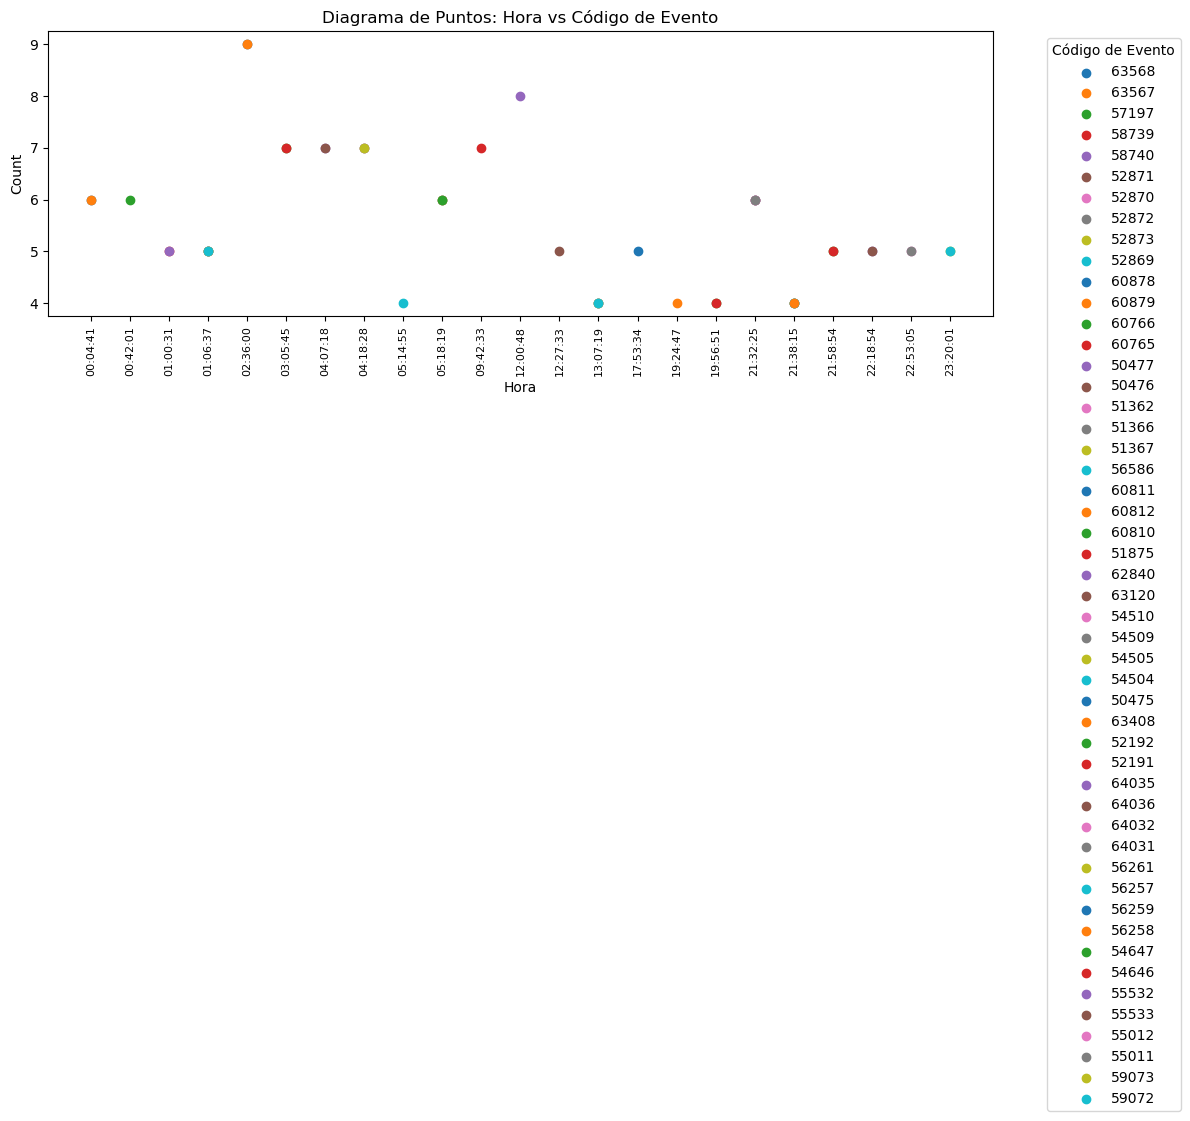

In [14]:
# Paso 1: Reemplazar valores no numéricos con NaN
df['json.source_json.eventData.IpPort'] = pd.to_numeric(df['json.source_json.eventData.IpPort'], errors='coerce')

# Paso 2: Eliminar filas con valores NaN en la columna 'json.source_json.eventData.IpPort'
df = df.dropna(subset=['json.source_json.eventData.IpPort'])

# Paso 3: Convertir la columna 'json.source_json.eventData.IpPort' a entero
df['json.source_json.eventData.IpPort'] = df['json.source_json.eventData.IpPort'].astype(int)

df_filtrado = df[df['json.source_json.eventData.IpPort'] != 0]  # Filtrar los valores no deseados

# Paso 4: Agrupar y contar ocurrencias
df_agrupado = df_filtrado.groupby(['hora', 'json.source_json.eventData.IpPort']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

# Seleccionar los primeros 100 registros
top_100 = df_agrupado.head(50).sort_values(by='hora')

# Crear el diagrama de puntos
plt.figure(figsize=(12, 8))

# Graficar cada 'json.source_json.eventData.IpPort' individualmente como puntos
for ip_port in top_100['json.source_json.eventData.IpPort'].unique():
    subset = top_100[top_100['json.source_json.eventData.IpPort'] == ip_port]
    plt.scatter(subset['hora'], subset['count'], label=ip_port)

plt.xlabel('Hora')
plt.ylabel('Count')
plt.title('Diagrama de Puntos: Hora vs Código de Evento')
plt.legend(title='Código de Evento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, fontsize=8)  # Ajusta el tamaño de la fuente según sea necesario
plt.tight_layout()
plt.show()



In [15]:
df_agrupado.head()

,hora,json.source_json.eventData.IpPort,count
53655,02:36:00,60879,9
53654,02:36:00,60878,9
454532,12:00:48,62840,8
63844,03:05:45,60765,7
82274,04:07:18,50476,7


# Fecha 

Primeros 7 datos en orden descendente por 'count':
            fecha  json.source_json.eventData.IpPort  count
52574  2024/07/18                              49926     40
12056  2024/07/15                              60811     39
52575  2024/07/18                              49927     38
52953  2024/07/18                              50305     37
18223  2024/07/16                              49867     36
54752  2024/07/18                              52104     36
65488  2024/07/18                              62840     36


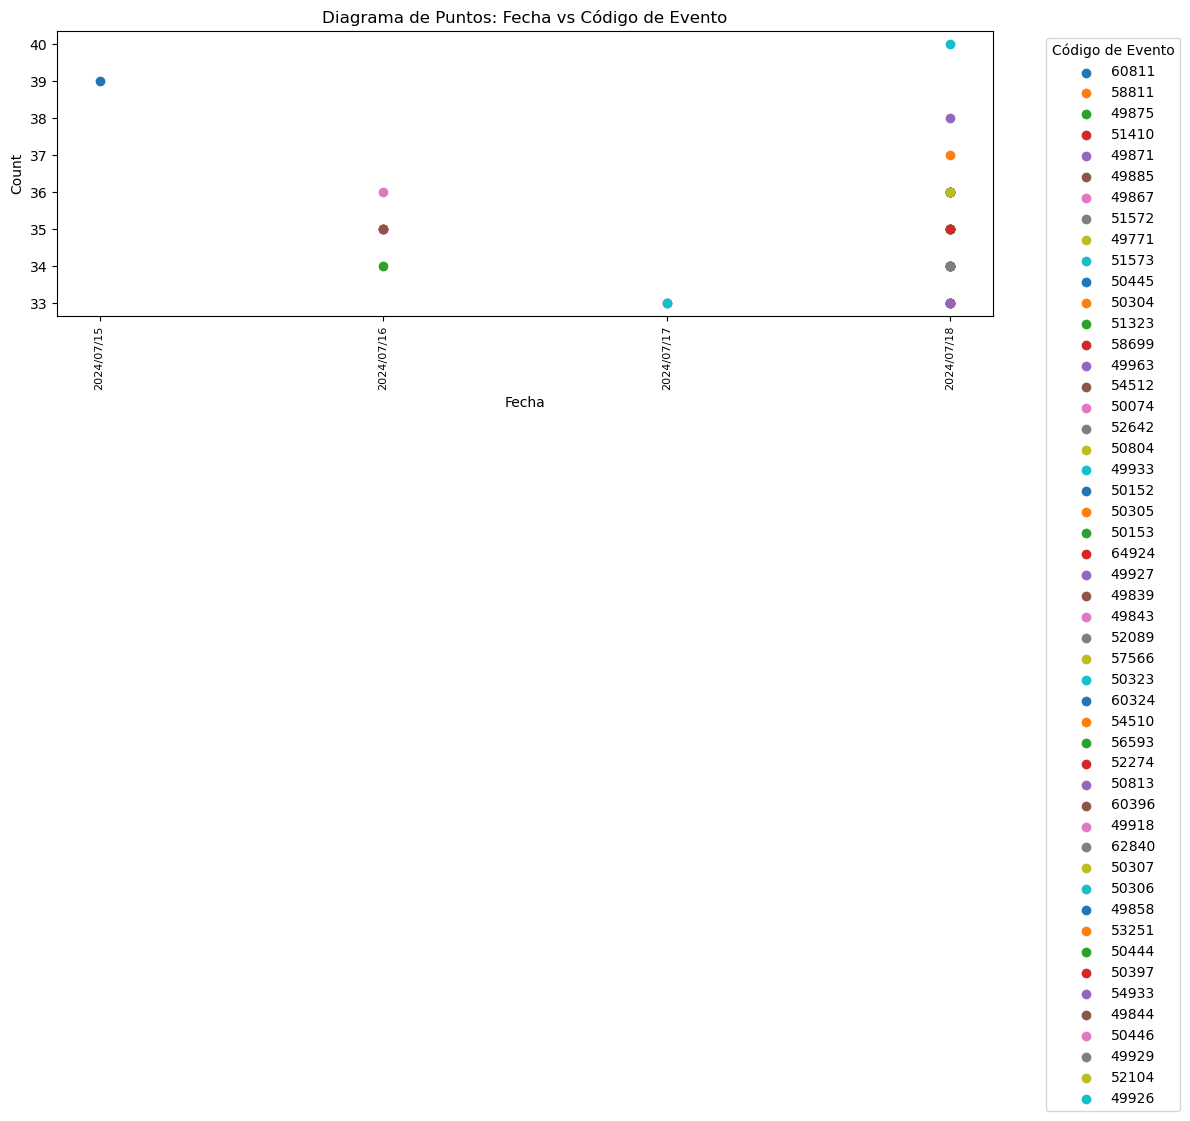

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Reemplazar valores no numéricos con NaN
df['json.source_json.eventData.IpPort'] = pd.to_numeric(df['json.source_json.eventData.IpPort'], errors='coerce')

# Paso 2: Eliminar filas con valores NaN en la columna 'json.source_json.eventData.IpPort'
df = df.dropna(subset=['json.source_json.eventData.IpPort'])

# Paso 3: Convertir la columna 'json.source_json.eventData.IpPort' a entero
df['json.source_json.eventData.IpPort'] = df['json.source_json.eventData.IpPort'].astype(int)

# Filtrar los valores no deseados
df_filtrado = df[df['json.source_json.eventData.IpPort'] != 0]

# Paso 4: Agrupar y contar ocurrencias
df_agrupado = df_filtrado.groupby(['fecha', 'json.source_json.eventData.IpPort']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

# Seleccionar los primeros 50 registros
top_50 = df_agrupado.head(50).sort_values(by='fecha')

# Mostrar los primeros 7 datos en orden descendente por 'count'
print("Primeros 7 datos en orden descendente por 'count':")
print(top_50.sort_values(by='count', ascending=False).head(7))

# Crear el diagrama de puntos
plt.figure(figsize=(12, 8))

# Graficar cada 'json.source_json.eventData.IpPort' individualmente como puntos
for ip_port in top_50['json.source_json.eventData.IpPort'].unique():
    subset = top_50[top_50['json.source_json.eventData.IpPort'] == ip_port]
    plt.scatter(subset['fecha'], subset['count'], label=ip_port)

plt.xlabel('Fecha')
plt.ylabel('Count')
plt.title('Diagrama de Puntos: Fecha vs Código de Evento')
plt.legend(title='Código de Evento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, fontsize=8)  # Ajusta el tamaño de la fuente según sea necesario
plt.tight_layout()
plt.show()


# Con el Valor Nulo = 0

C:\Users\Windows 10 Pro\AppData\Local\Temp\ipykernel_20576\513217204.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


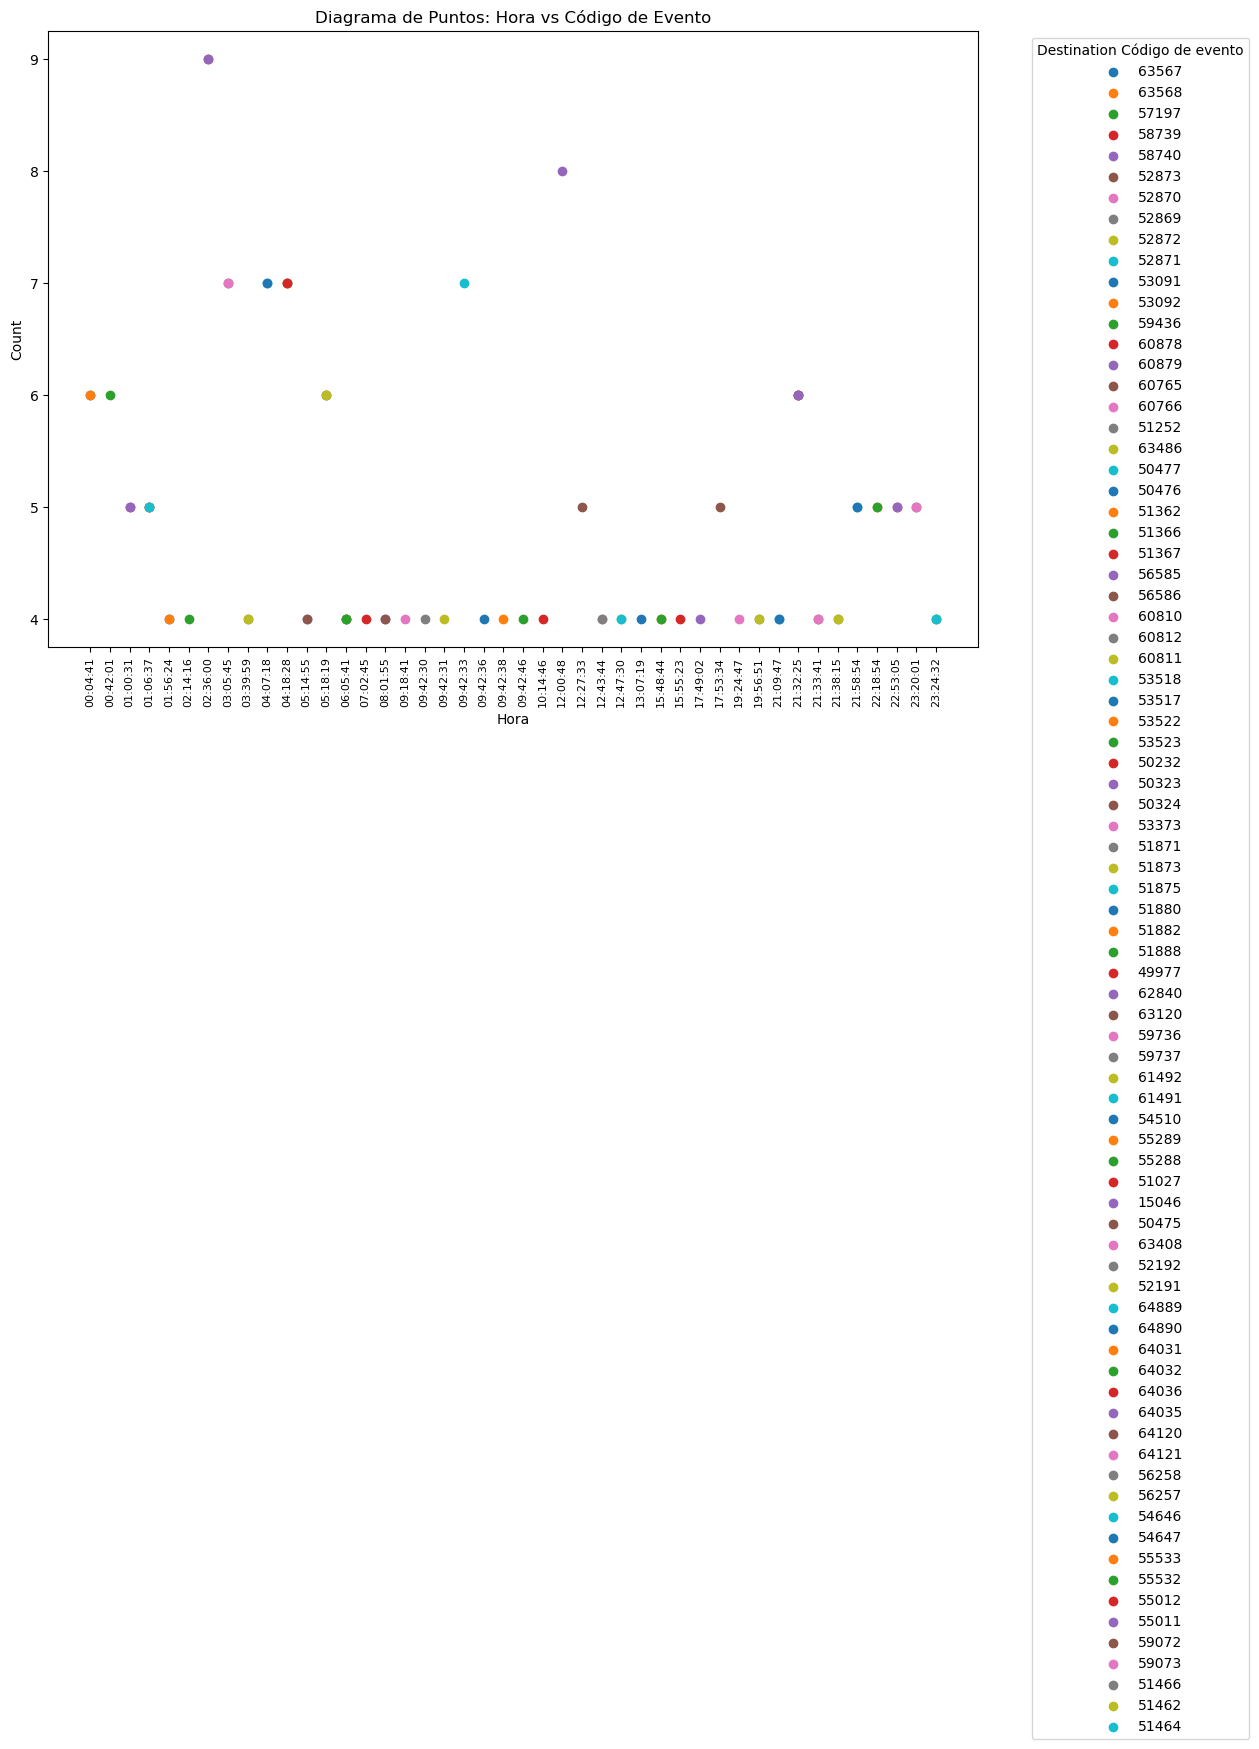

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Reemplazar valores no numéricos en 'IpPort' con NaN
df['json.source_json.eventData.IpPort'] = pd.to_numeric(df['json.source_json.eventData.IpPort'], errors='coerce')


df = df.dropna(subset=['json.source_json.eventData.IpPort'])


df['json.source_json.eventData.IpPort'] = df['json.source_json.eventData.IpPort'].astype(int)


df_agrupado = df.groupby(['hora', 'json.source_json.eventData.IpPort']).size().reset_index(name='count')


df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

# Seleccionar los primeros 50 registros
top_50 = df_agrupado.head(80).sort_values(by='hora')

# Crear el diagrama de puntos
plt.figure(figsize=(12, 8))

# Graficar cada 'json.source_json.eventData.IpPort' individualmente como puntos
for address in top_50['json.source_json.eventData.IpPort'].unique():
    subset = top_50[top_50['json.source_json.eventData.IpPort'] == address]
    plt.scatter(subset['hora'], subset['count'], label=address)

plt.xlabel('Hora')
plt.ylabel('Count')
plt.title('Diagrama de Puntos: Hora vs Código de Evento')
plt.legend(title='Destination Código de evento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, fontsize=8)  # Ajusta el tamaño de la fuente según sea necesario
plt.tight_layout()
plt.show()


In [17]:
df_agrupado.head()

,hora,json.source_json.eventData.IpPort,count
53655,02:36:00,60879,9
53654,02:36:00,60878,9
454593,12:00:48,62840,8
85595,04:18:28,51366,7
63845,03:05:45,60766,7


# 4. Json.result 

In [18]:
df["json.result"].unique()

array(['SUCCESS', 'FAILED_BAD_LOGIN', 'FAILED_BAD_PASSWORD',
       'FAILED_ACCOUNT_DISABLED', nan, 'FAILED_OTHER'], dtype=object)

Primeras 5 filas del conteo de sucesos agrupado por hora:
           hora json.result  count
40764  11:49:47     SUCCESS    105
38640  11:14:36     SUCCESS    101
37908  11:02:38     SUCCESS     96
48974  14:09:38     SUCCESS     95
32151  09:27:22     SUCCESS     91


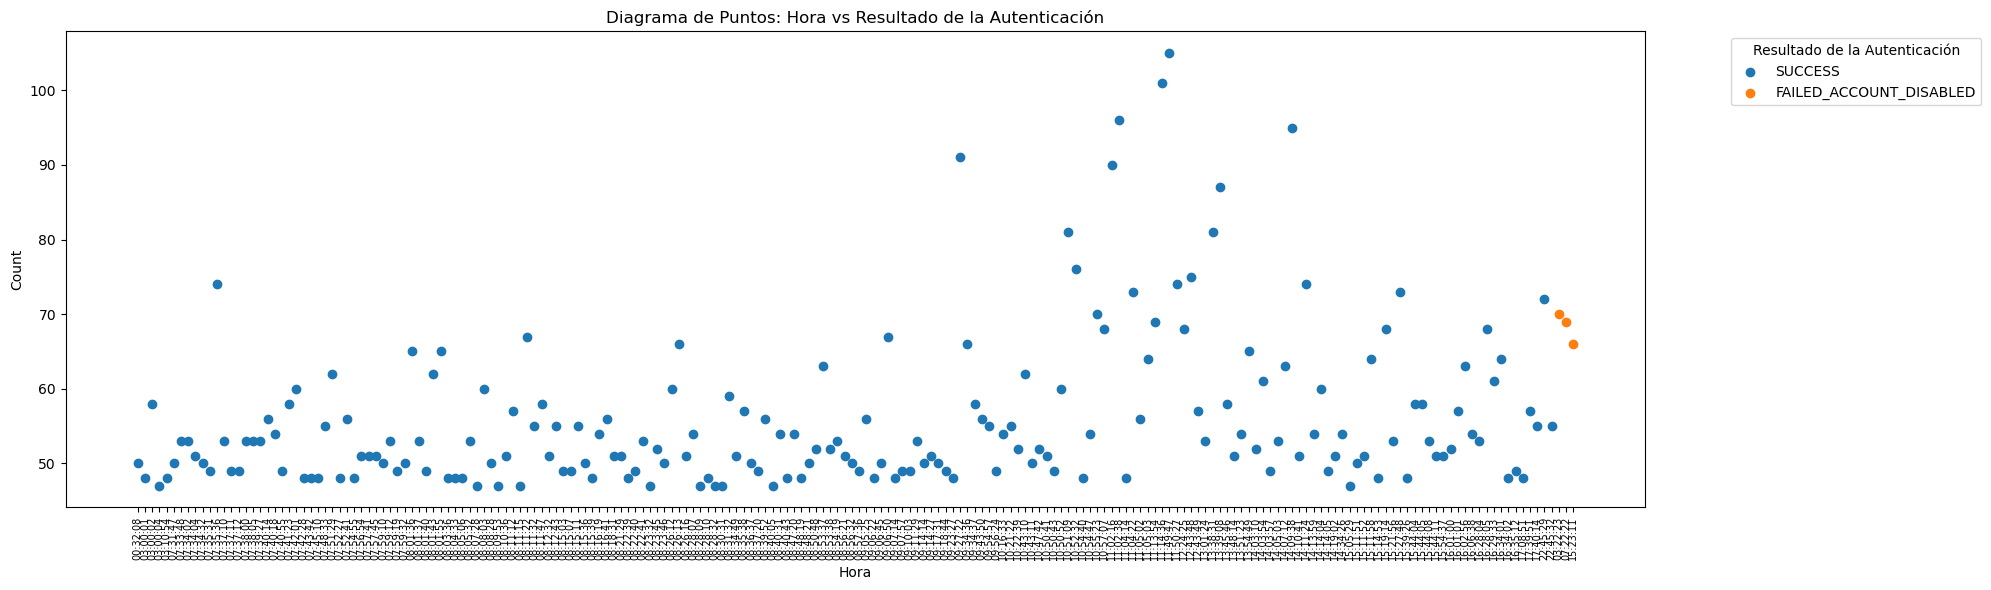

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar y contar ocurrencias
df_agrupado = df_filtrado.groupby(['hora', 'json.result']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

# Imprimir las primeras 5 filas del DataFrame agrupado
print("Primeras 5 filas del conteo de sucesos agrupado por hora:")
print(df_agrupado.head())

# Seleccionar los primeros 200 registros
top_200 = df_agrupado.head(200).sort_values(by='hora')

# Crear el diagrama de puntos
plt.figure(figsize=(20, 6))

# Graficar cada 'json.result' individualmente como puntos
for result in top_200['json.result'].unique():
    subset = top_200[top_200['json.result'] == result]
    plt.scatter(subset['hora'], subset['count'], label=result)

plt.xlabel('Hora')
plt.ylabel('Count')
plt.title('Diagrama de Puntos: Hora vs Resultado de la Autenticación')
plt.legend(title='Resultado de la Autenticación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, fontsize=7)  # Ajusta el tamaño de la fuente según sea necesario
plt.tight_layout()
plt.show()



# Por Fecha 

Primeras 5 filas del conteo de sucesos agrupado por fecha:
         fecha       json.result   count
19  2024/07/18           SUCCESS  298334
9   2024/07/16           SUCCESS  260574
14  2024/07/17           SUCCESS  217485
4   2024/07/15           SUCCESS  106274
16  2024/07/18  FAILED_BAD_LOGIN     822


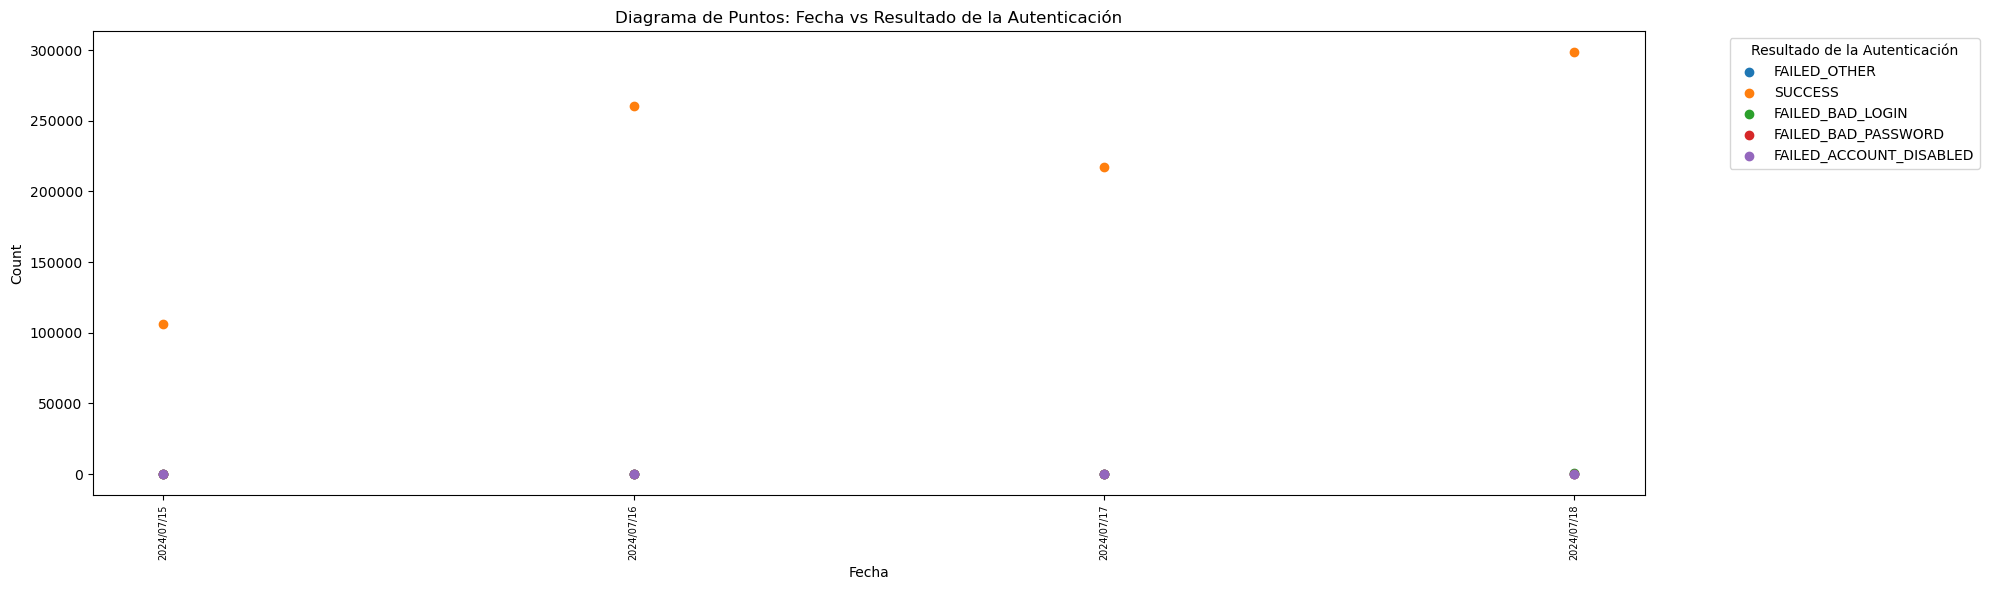

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar y contar ocurrencias
df_agrupado = df_filtrado.groupby(['fecha', 'json.result']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

# Imprimir las primeras 5 filas del DataFrame agrupado
print("Primeras 5 filas del conteo de sucesos agrupado por fecha:")
print(df_agrupado.head())

# Seleccionar los primeros 200 registros
top_200 = df_agrupado.head(200).sort_values(by='fecha')

# Crear el diagrama de puntos
plt.figure(figsize=(20, 6))

# Graficar cada 'json.result' individualmente como puntos
for result in top_200['json.result'].unique():
    subset = top_200[top_200['json.result'] == result]
    plt.scatter(subset['fecha'], subset['count'], label=result)

plt.xlabel('Fecha')
plt.ylabel('Count')
plt.title('Diagrama de Puntos: Fecha vs Resultado de la Autenticación')
plt.legend(title='Resultado de la Autenticación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, fontsize=7)  # Ajusta el tamaño de la fuente según sea necesario
plt.tight_layout()
plt.show()
